# Scipy Image Manipulation and Processing

## Opening and writing to image files

In [1]:
# Writing an array to a file

from scipy import misc
import imageio

face = misc.face()
imageio.imsave('scipyImage/face.png', face) # uses the Image module PIL

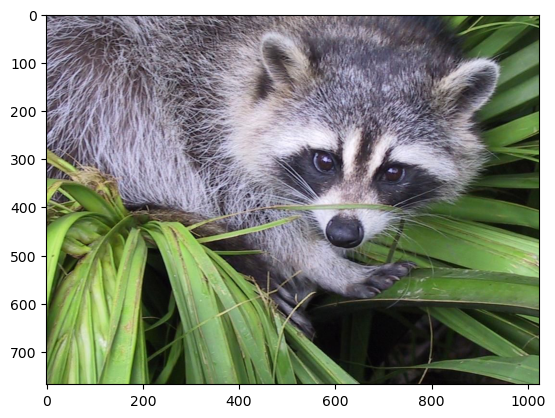

In [2]:
import matplotlib.pyplot as plt

plt.imshow(face)
plt.show()

In [3]:
# Creating a numpy array from an image file 
face = imageio.imread('scipyImage/face.png')

/tmp/ipykernel_65418/2979356066.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face = imageio.imread('scipyImage/face.png')


In [4]:
type(face)

imageio.core.util.Array

In [5]:
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

In [6]:
face.size

2359296

In [7]:
768*1024*3

2359296

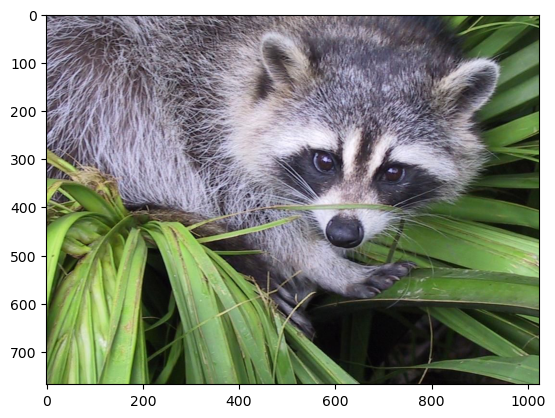

In [8]:
plt.imshow(face)
plt.show()

## Displaying images

In [9]:
f = misc.face(gray=True)
type(f), f.shape

(numpy.ndarray, (768, 1024))

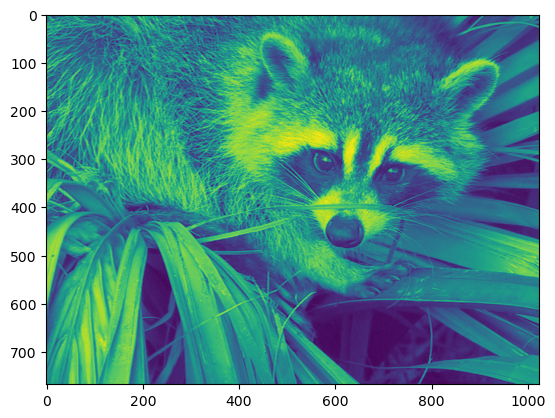

In [10]:
plt.imshow(f)
plt.show()

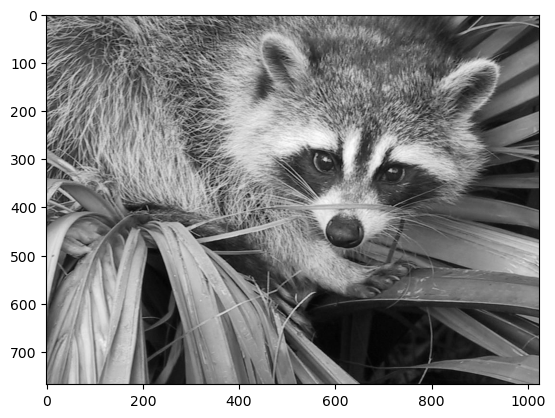

In [11]:
plt.imshow(f, cmap=plt.cm.gray)
plt.show()

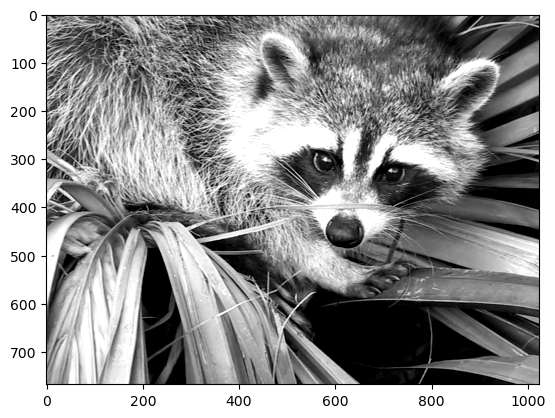

In [12]:
# Increase contrast by setting min and max value

plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)
plt.show()

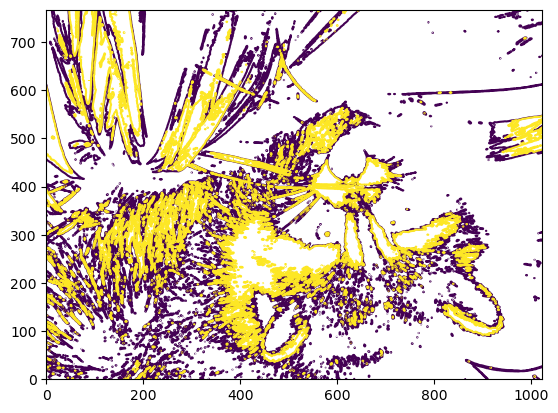

In [13]:
# Draw contour lines

plt.contour(f, [150,180])
plt.show()

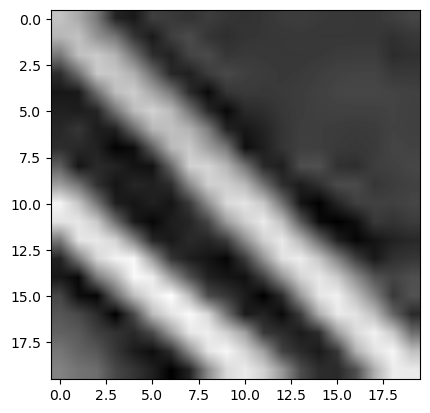

In [14]:
# For smooth intensity variations, 
# use interpolation='bilinear'

plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='bilinear')
plt.show()

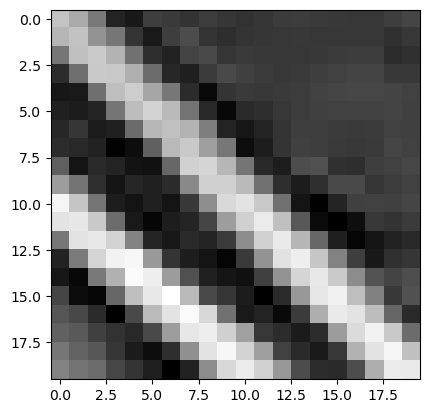

In [15]:
# For fine inspection of intensity variations, 
# use interpolation='nearest'

plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='nearest')
plt.show()

### Statistical Information

In [16]:
face = misc.face(gray=True)
face.mean()

113.48026784261067

In [17]:
face.max(), face.min()

(250, 0)

## Image filtering

### Blurring / Smoothing

<b>Gaussian filter</b> from `scipy.ndimage`:

In [18]:
from scipy import misc
face = misc.face(gray=True)

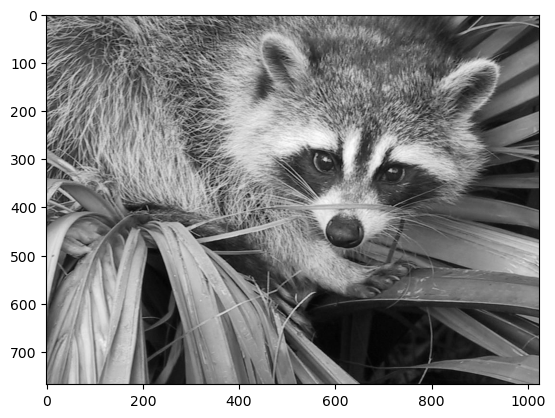

In [19]:
plt.imshow(face, cmap='gray')
plt.show()

In [20]:
from scipy import ndimage

blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)
extreme_blurred = ndimage.gaussian_filter(face, sigma=10)

In [21]:
face.shape, blurred_face.shape, very_blurred.shape

((768, 1024), (768, 1024), (768, 1024))

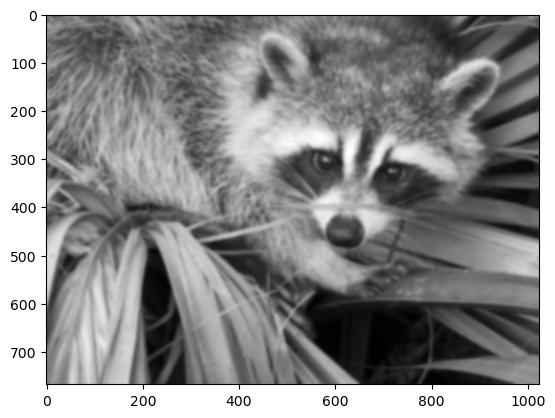

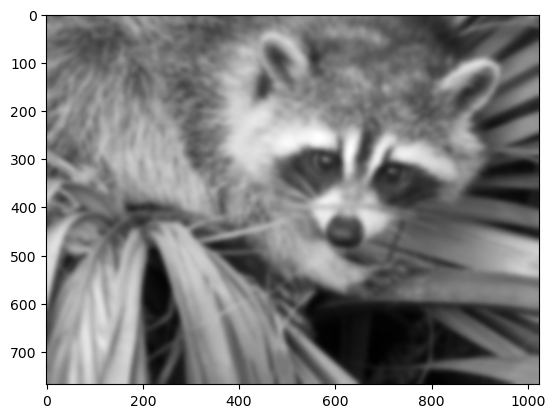

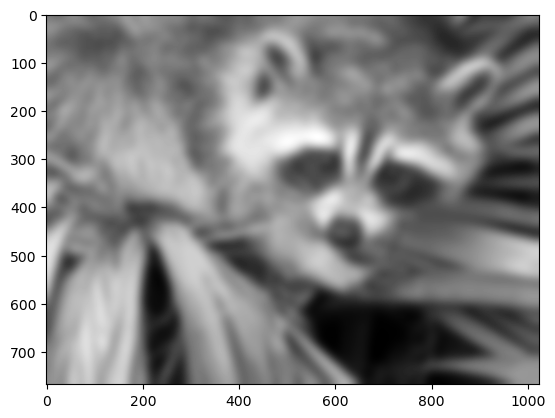

In [22]:
plt.imshow(blurred_face, cmap='gray')
plt.show()

plt.imshow(very_blurred, cmap='gray')
plt.show()

plt.imshow(extreme_blurred, cmap='gray')
plt.show()

<b>Uniform filter</b>

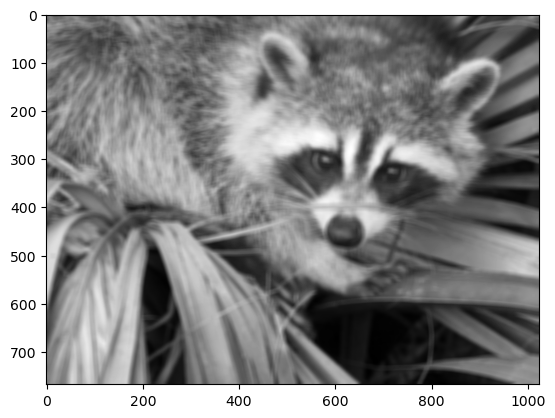

In [23]:
local_mean = ndimage.uniform_filter(face, size=11)

plt.imshow(local_mean, cmap='gray')
plt.show()

### Sharpening

In [24]:
from scipy import misc
face = misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(face, 3)

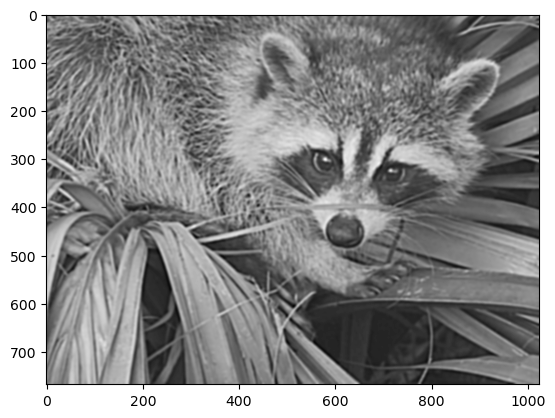

In [25]:
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.imshow(sharpened, cmap='gray')
plt.show()

### Blurring Smoothing Exercise

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import pandas as pd
import joblib

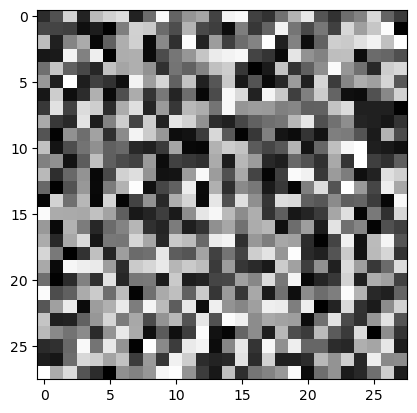

In [27]:
arr = np.random.randint(0, 256, (28,28))

plt.imshow(arr, cmap="gray")
plt.show()

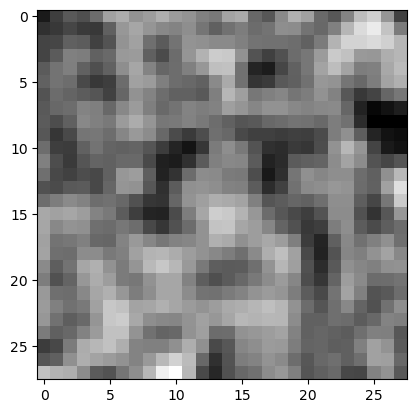

In [45]:
new_arr = ndimage.gaussian_filter(arr, sigma=1)


joblib.dump(new_arr, "array_dump_random.pkl")

plt.imshow(new_arr, cmap='gray')
plt.show()

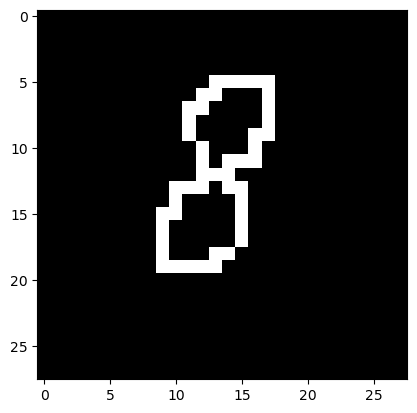

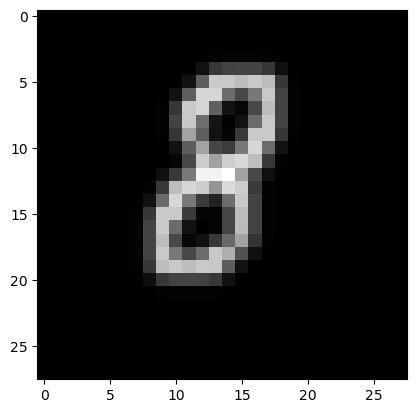

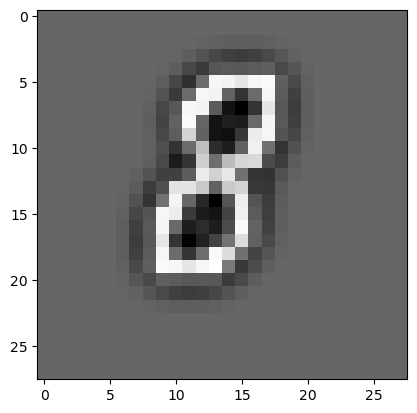

In [47]:
my_arr = joblib.load("array_dump.pkl")

plt.imshow(my_arr, cmap='gray')
plt.show()

blurred_my_arr = ndimage.gaussian_filter(my_arr, sigma=0.7)

plt.imshow(blurred_my_arr, cmap='gray')
plt.show()

filter_blurred_arr = ndimage.gaussian_filter(blurred_my_arr, 1)
alpha = 20
sharpened = blurred_my_arr + alpha * (blurred_my_arr - filter_blurred_arr)

plt.imshow(sharpened, cmap='gray')
plt.show()

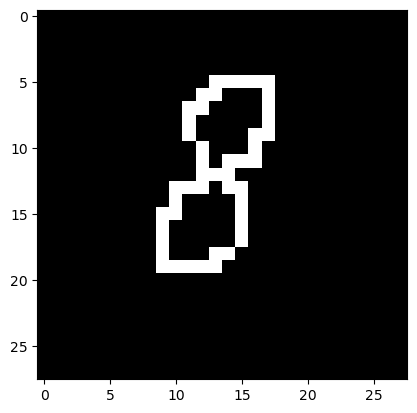

In [50]:
plt.imshow(my_arr, cmap='gray')
plt.show()

In [51]:
my_arr.max()

255.0